In [1286]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1287]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [1288]:
houses_df = pd.read_csv("train.csv")

# Loading Data Set

In [1289]:
# Getting deatils for data dictionary
print(f'\nShape :\n{houses_df.shape}')
print(f'\nColumns :\n{houses_df.columns}')


Shape :
(1460, 81)

Columns :
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
 

In [1290]:
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1291]:
# Setting Size to get the proper displauy
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225
houses_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Cleaning Data Set

In [1292]:
houses_df = houses_df.drop(['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis = 1)
houses_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [1293]:
houses_df.shape

(1460, 75)

In [1294]:
# There are onl 259 missing values we could impute with median to make our data set stronger.
houses_df['LotFrontage'] = houses_df['LotFrontage'].fillna(houses_df['LotFrontage'].median())

# For 81 columns we took the median value since most of the houses do have gargegs. we will use median to get 
# middle of the of the garges values
houses_df['GarageYrBlt'] = houses_df['GarageYrBlt'].fillna(houses_df['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    houses_df[col] = houses_df[col].fillna(houses_df[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    houses_df[col] = houses_df[col].fillna(houses_df[col].mode()[0])
    
# Since these are only 8 values we decided t to use most common architecture pattern
# hence decided to stick with mode.
for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    houses_df[col] = houses_df[col].fillna(houses_df[col].mode()[0])

In [1295]:
# Athough Accuracy was high if we dropped na rows but since we have lot less data set we decided
# to do feature engineering to imput the values
#houses_df.dropna(axis='rows', inplace=True)
#houses_df.shape

In [1296]:
houses_df
houses_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [1297]:
# Do we need to consider YoSold as well just to get gist if reselling again and again reprents an underylyin
# problem or is it advantage.
houses_df['YearsBuiltSince'] = pd.datetime.now().year - houses_df['YearBuilt']
houses_df['YearRemodAddSince'] = pd.datetime.now().year - houses_df['YearRemodAdd']
houses_df['GarageYrBltSince'] = pd.datetime.now().year - houses_df['GarageYrBlt']

columns = houses_df.columns
houses_df = houses_df.reindex(columns=columns)


In [1298]:
# Dropping since we have already considered the converted values till date
houses_df = houses_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1)

In [1299]:
# Getting the unique number of counts
for x in houses_df.columns:
    print(houses_df[x].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
68.0      19
24.0      19
64.0      19
73.0      18
63.0      17
55.0      17
79.0      17
72.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
40.0      12
71.0      12
43.0      12
67.0      12
82.0      12
57.0      12
76.0      11
34.0      10
53.0      10
88.0      10
86.0      10
92.0      10
44.0       9
62.0       9
84.0       9
77.0       9
35.0       9
96.0       8
98.0       8
61.0       8
93.0       8
120.0      7
107.0      7
95.0       7
58.0       7
41.0       6
30.0       6
105.0      6
94.0  

In [1300]:
# Have only one or two values and hence dropping it
print(houses_df['PoolArea'].value_counts())
print(houses_df['3SsnPorch'].value_counts())

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64


In [1301]:
# Finding Out Non-Unique Variable to filter out categeorial variables already inserted with
# dummy.
houses_df_numerical = houses_df.select_dtypes(include=[np.number])
houses_df_numerical.nunique()

MSSubClass             15
LotFrontage           110
LotArea              1073
OverallQual            10
OverallCond             9
MasVnrArea            327
BsmtFinSF1            637
BsmtFinSF2            144
BsmtUnfSF             780
TotalBsmtSF           721
1stFlrSF              753
2ndFlrSF              417
LowQualFinSF           24
GrLivArea             861
BsmtFullBath            4
BsmtHalfBath            3
FullBath                4
HalfBath                3
BedroomAbvGr            8
KitchenAbvGr            4
TotRmsAbvGrd           12
Fireplaces              4
GarageCars              5
GarageArea            441
WoodDeckSF            274
OpenPorchSF           202
EnclosedPorch         120
3SsnPorch              20
ScreenPorch            76
PoolArea                8
MiscVal                21
MoSold                 12
YrSold                  5
SalePrice             663
YearsBuiltSince       112
YearRemodAddSince      61
GarageYrBltSince       97
dtype: int64

In [1302]:
houses_df_categorial = houses_df.select_dtypes(exclude=[np.number])
houses_df_categorial.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

After Manually  going through each of these columns we can filter numerical columns to category based on the unqiueness and business sense

In [1303]:
houses_df_categorial.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [1304]:
# NUMERICAL COLUMNS: 
number_cols = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal', 'YearsBuiltSince', 'YearRemodAddSince',
           'GarageYrBltSince']
print(len(number_cols))

# CATEGORICAL COLUMNS: 
category_cols = [ 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition','MSSubClass',]
print(len(category_cols))

30
43


In [1305]:
# Includes the Sale Price Column
houses_df.shape

(1460, 75)

# EDA

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

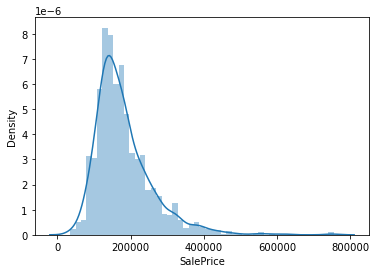

In [1306]:
sns.distplot(houses_df['SalePrice'])
# Prices are normally ditributed

<Figure size 432x288 with 0 Axes>

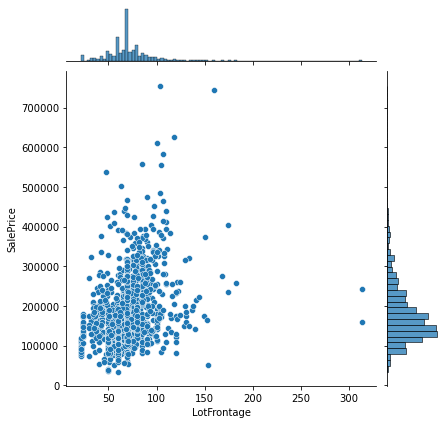

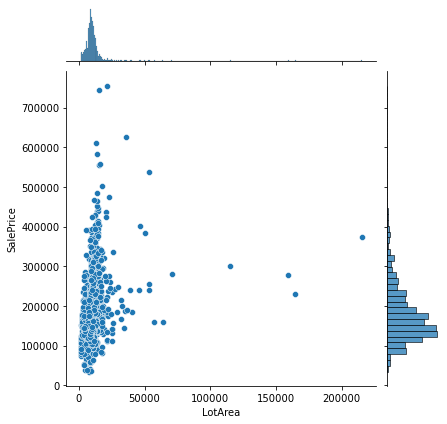

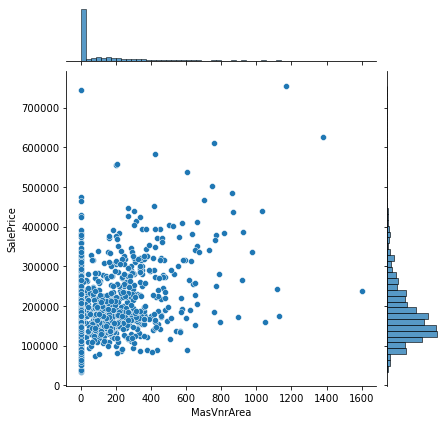

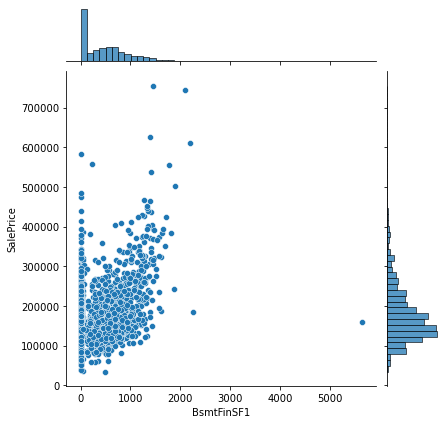

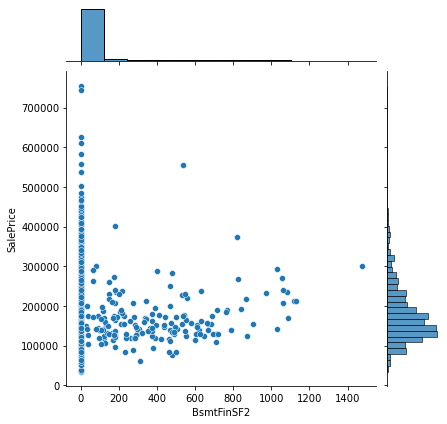

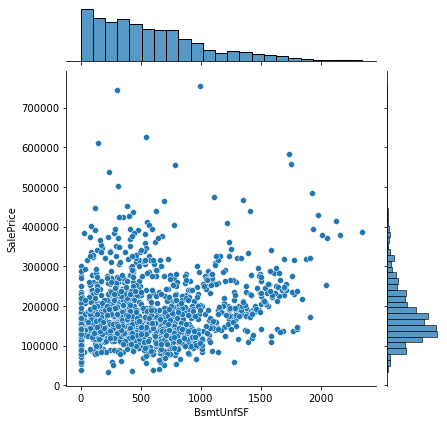

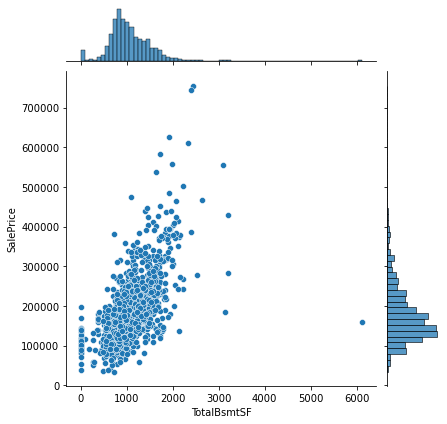

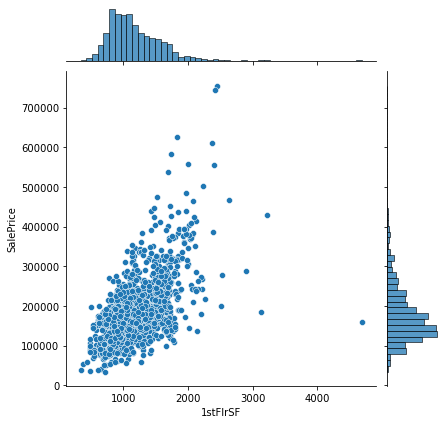

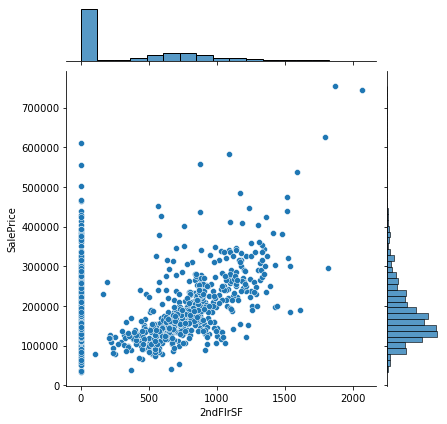

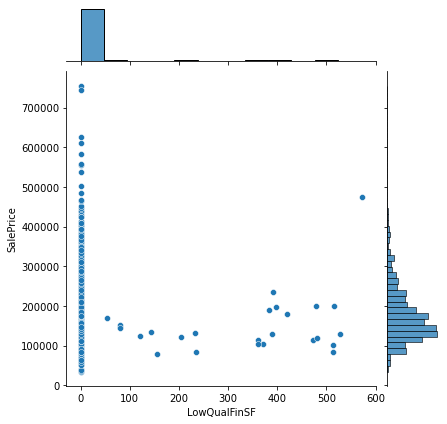

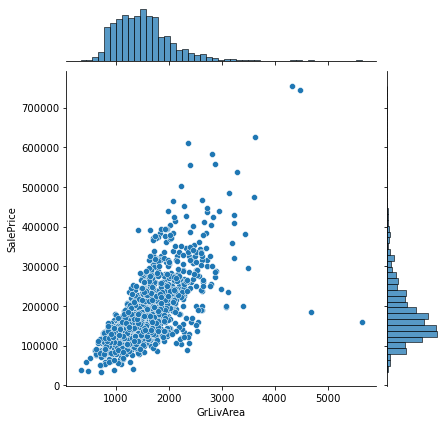

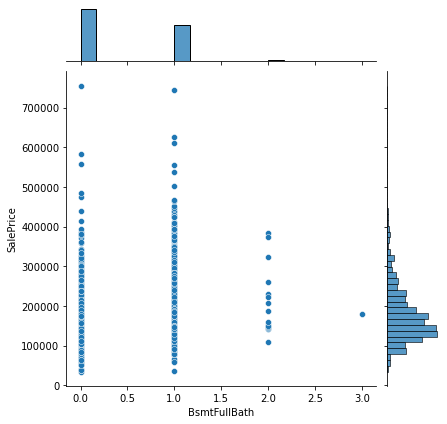

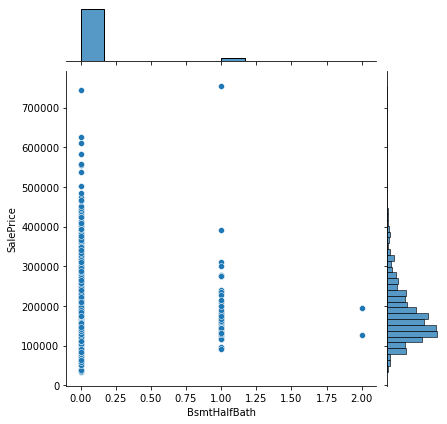

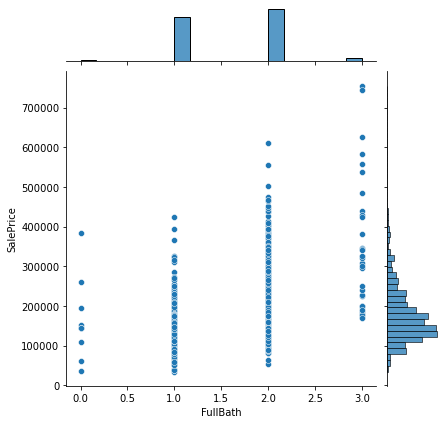

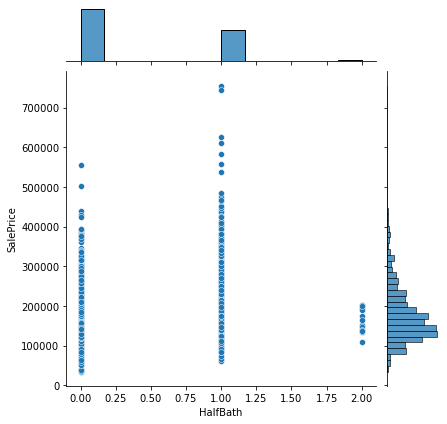

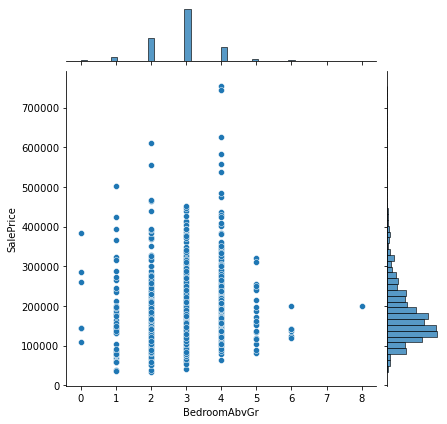

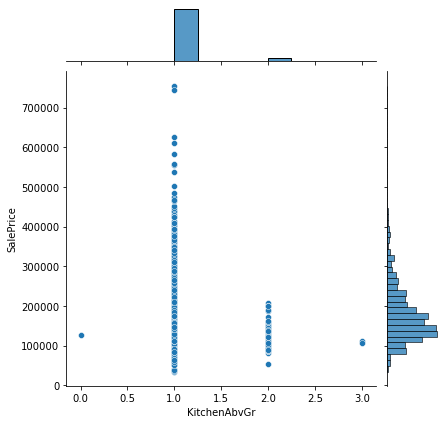

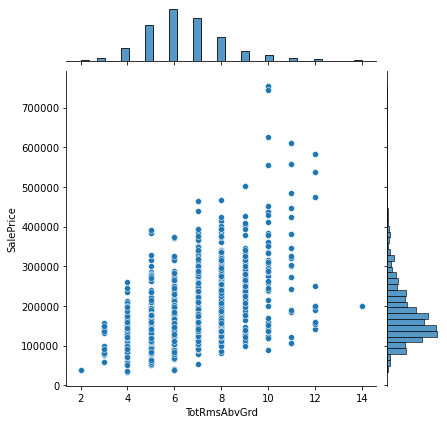

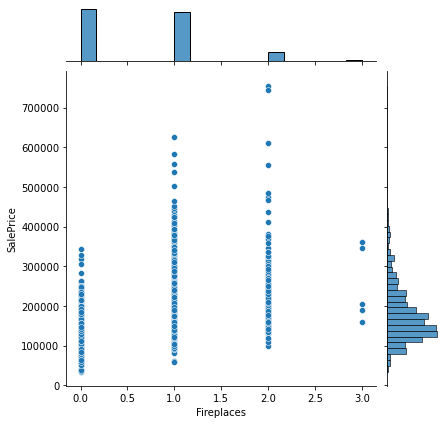

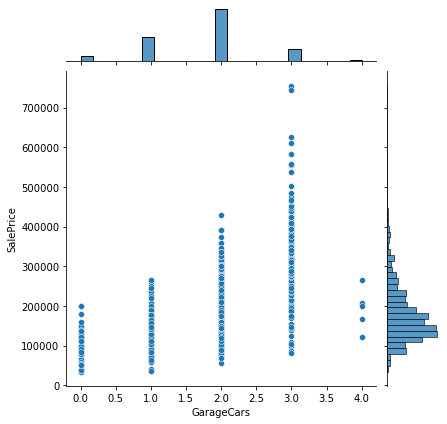

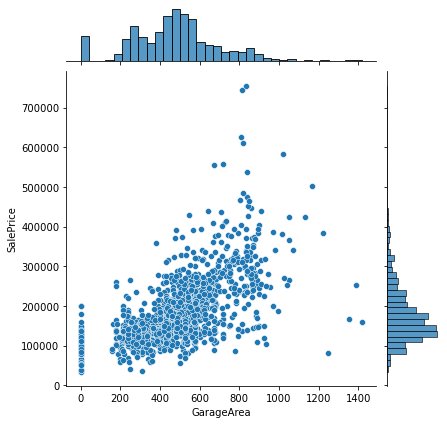

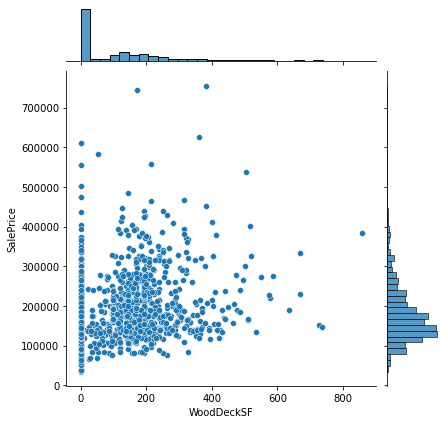

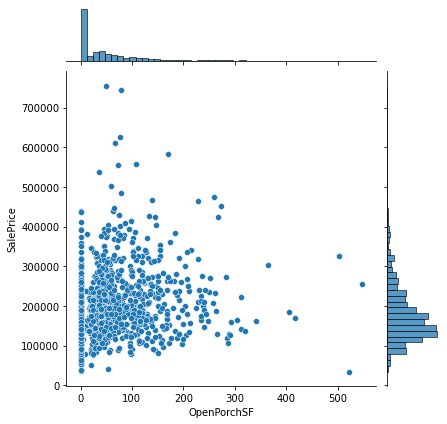

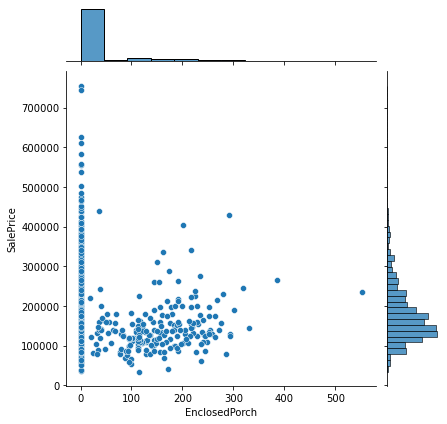

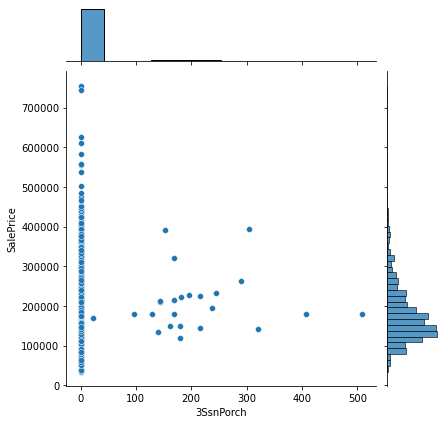

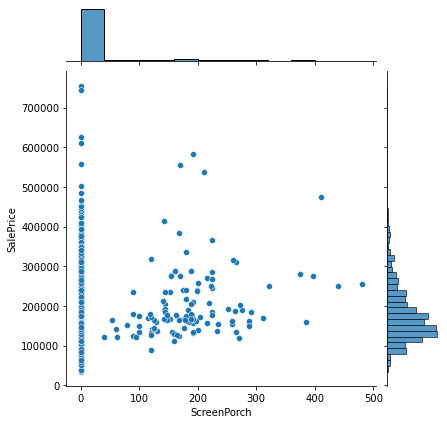

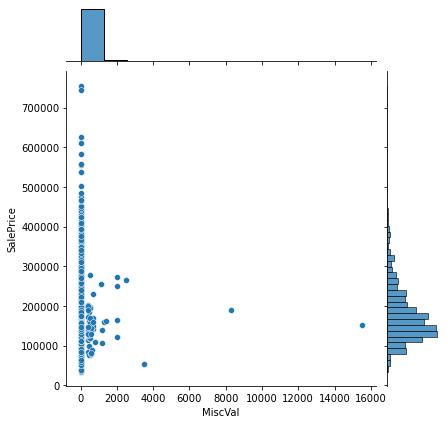

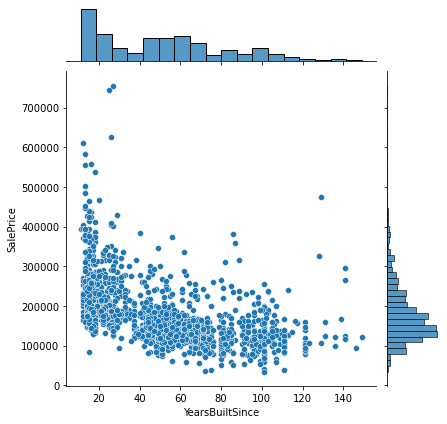

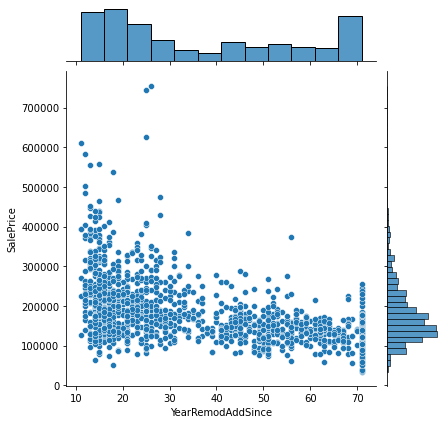

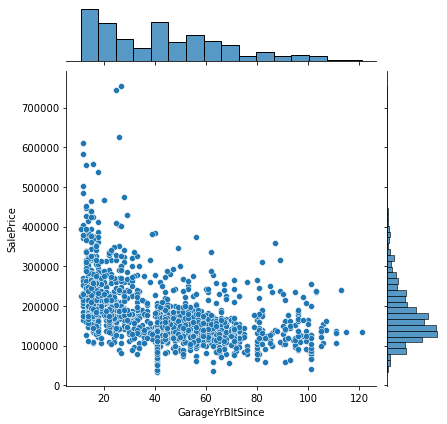

In [1307]:
# Predictor Variable
pred_var = 'SalePrice'
for i, col in enumerate(number_cols):
    plt.figure(i)
    sns.jointplot(x=col, y=pred_var, data=houses_df[[col,pred_var]])

We can see that the Sales Price is lineraly proportional to:
    a.First Floor SF
    b.Second Floor SF
    c.GrLivArea
    d Somewhat related to front porch
    
The Value decreases if:
    a. It is older flat
    b. Redmodelling is done in far past
    c. Garage was built in far past

<Figure size 432x288 with 0 Axes>

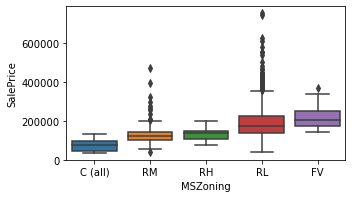

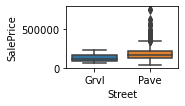

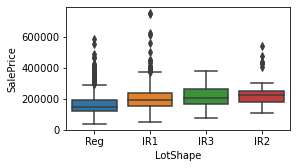

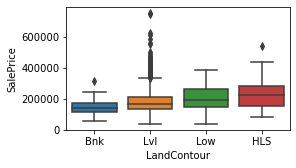

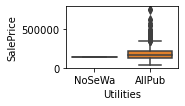

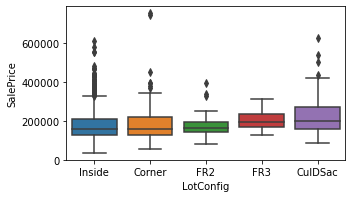

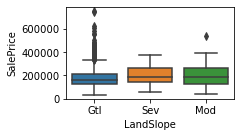

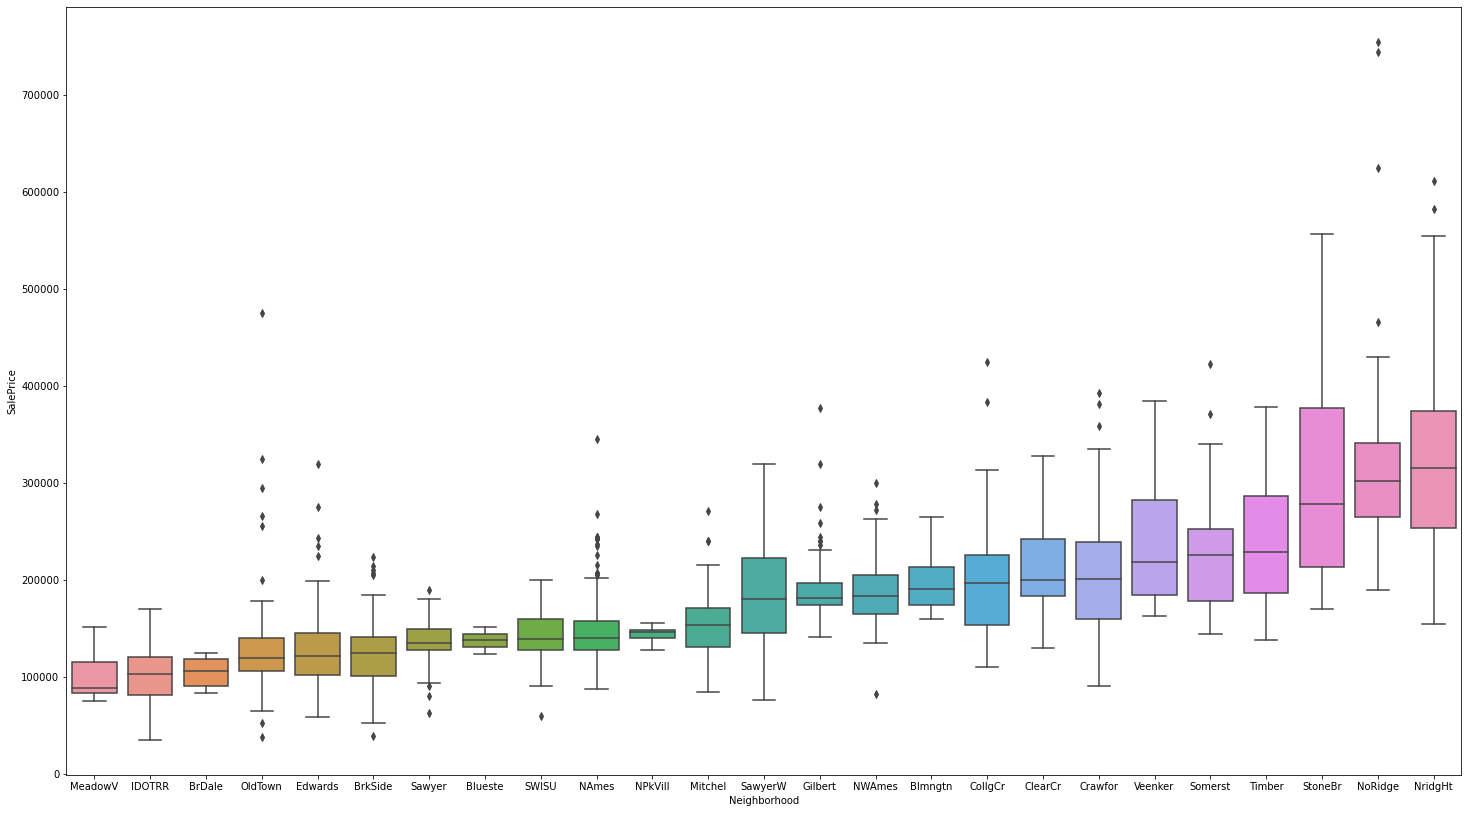

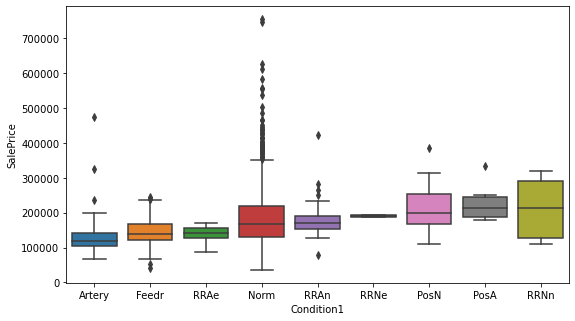

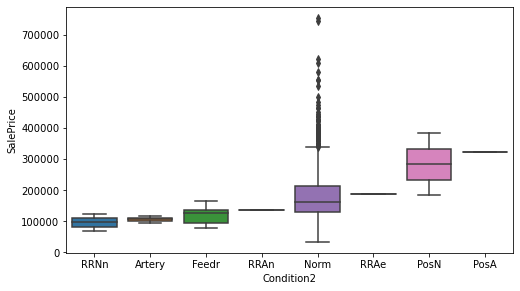

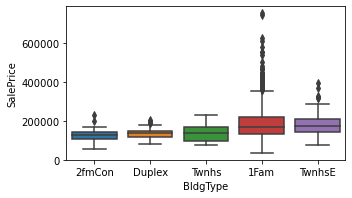

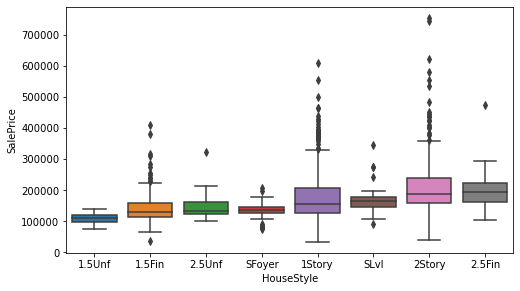

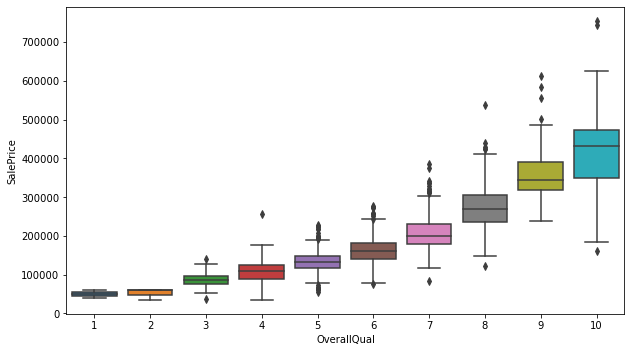

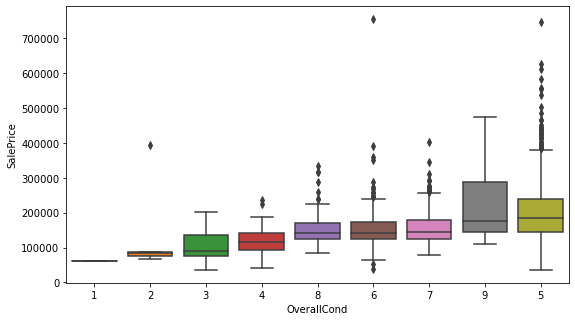

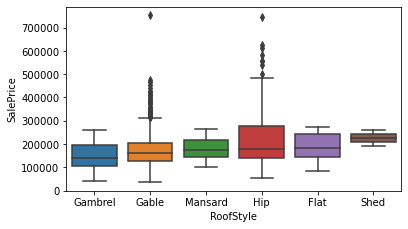

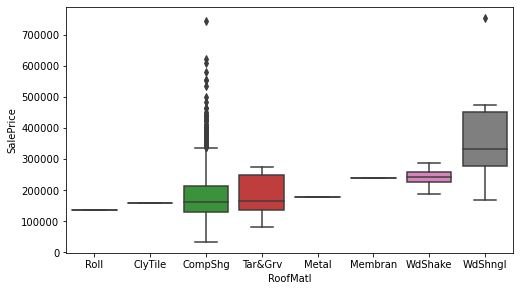

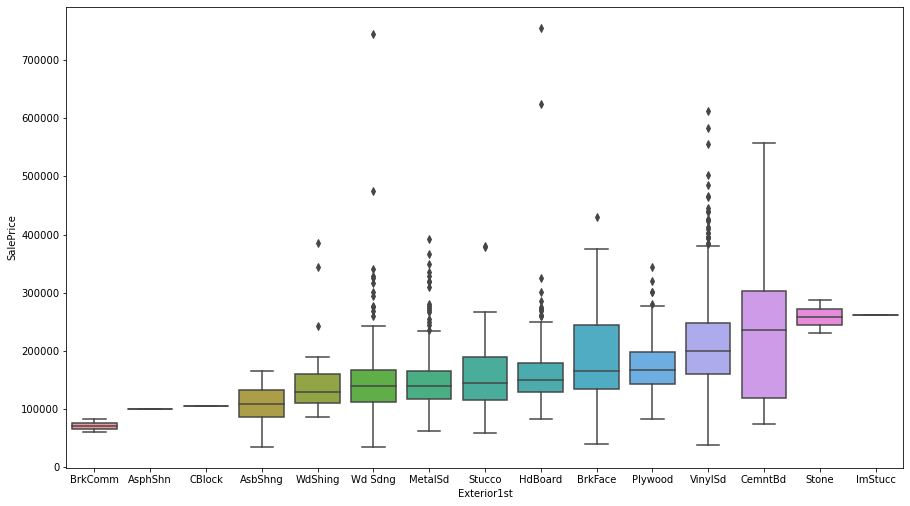

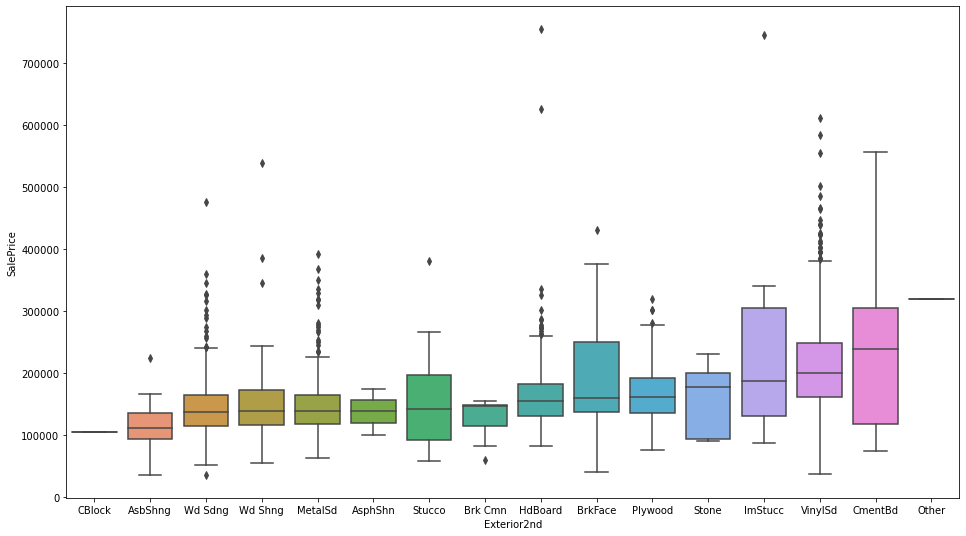

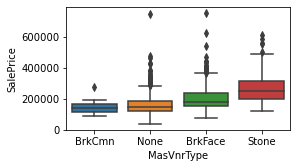

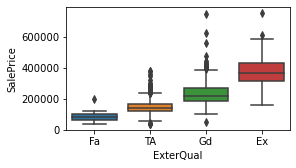

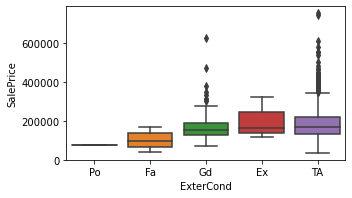

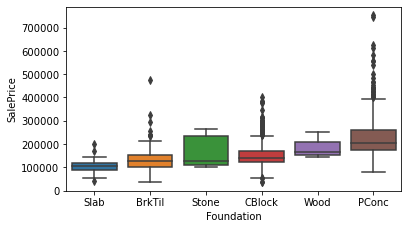

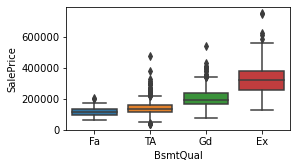

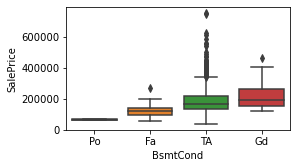

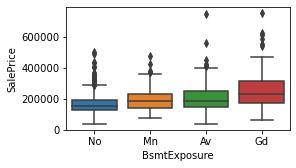

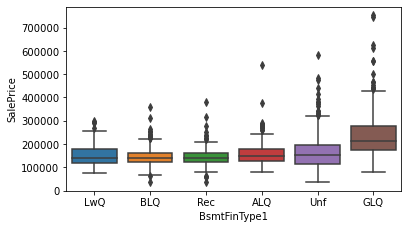

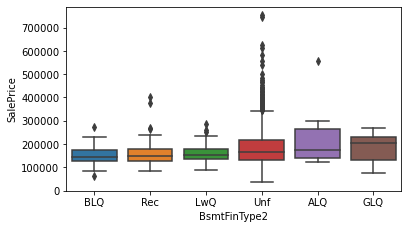

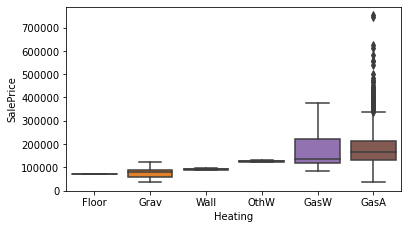

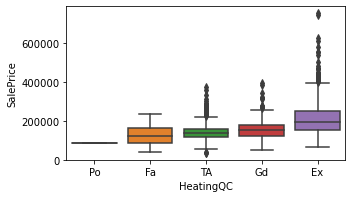

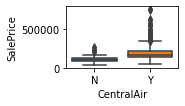

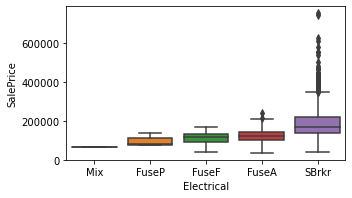

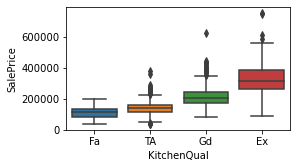

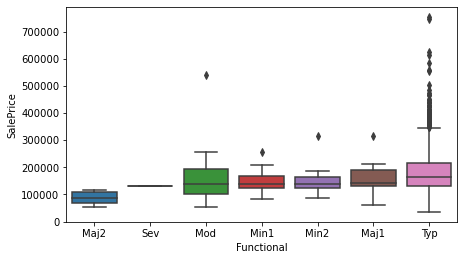

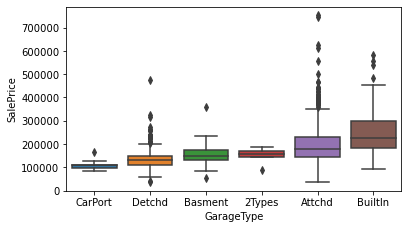

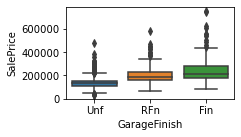

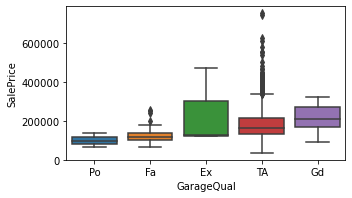

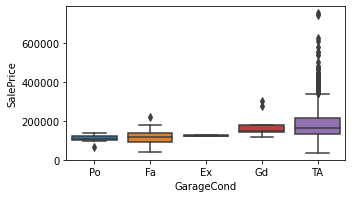

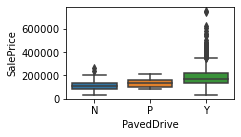

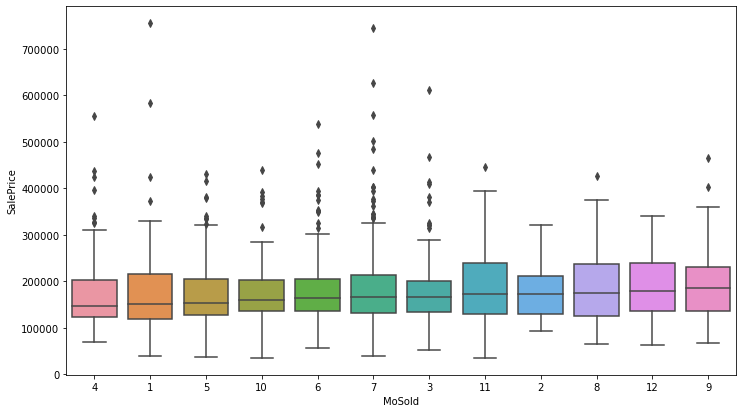

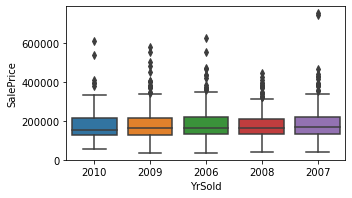

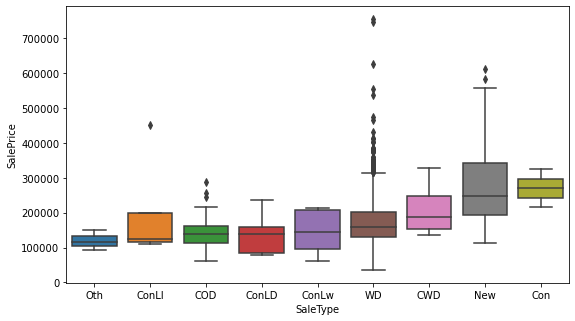

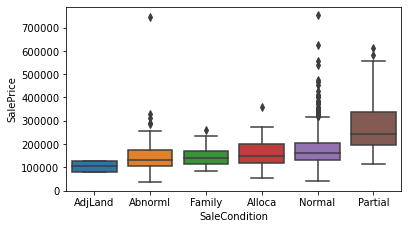

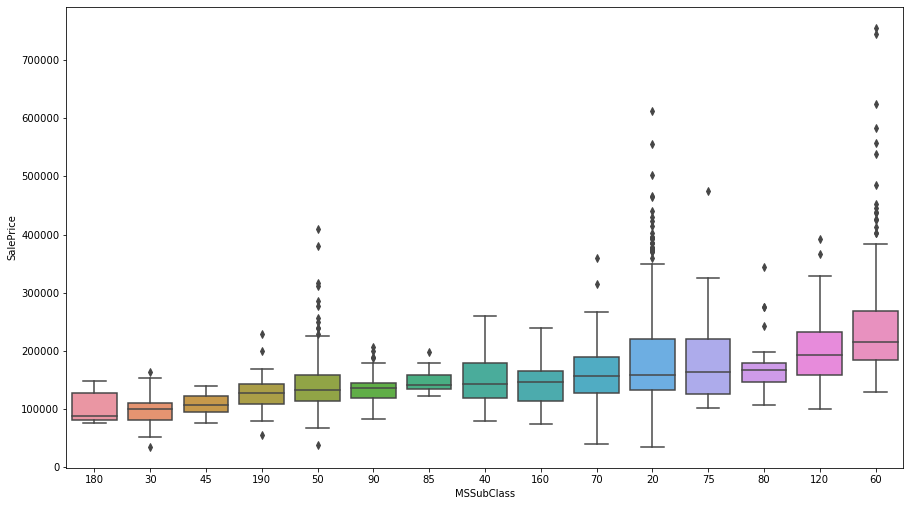

In [1308]:
for i, col in enumerate(category_cols):
    plt.figure(i)
    variables = houses_df[[col]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = houses_df[[col,pred_var]].groupby(by=[col])[pred_var].median().sort_values(ascending=True)
    sns.boxplot(x=col, y=pred_var, data=houses_df[[col,pred_var]], order=my_order.index)

We can see some of categorical variable make considerable difference like OvarallQual,MSZoing as Sales Price Linearly Increases.
We can later check if they form the final criteria for predictor variable

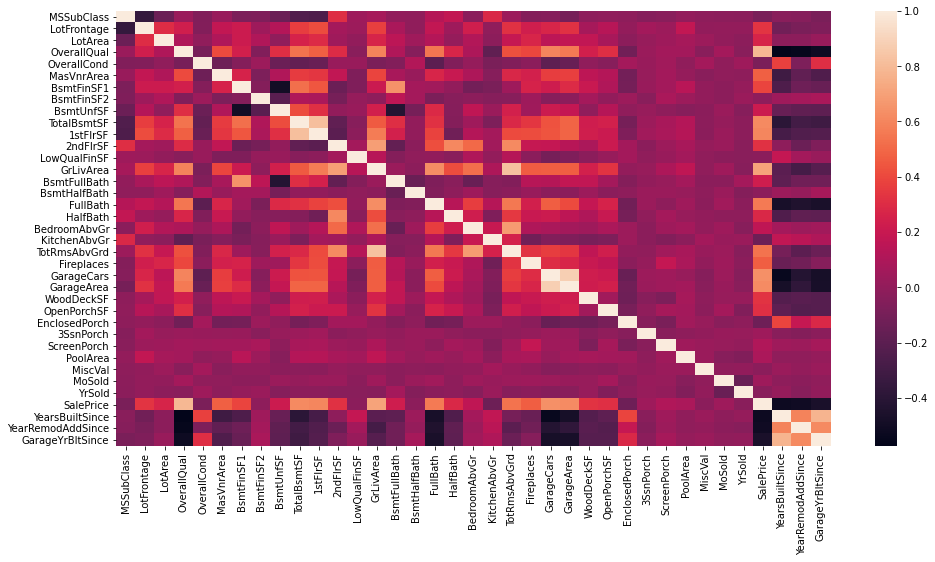

In [1309]:
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(houses_df.corr(), annot=False)
plt.show()

# Creating  Dummy Variables for Categorical Variables

In [1310]:
# Dumifying all columns using a loop
for col in category_cols:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(houses_df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_D_')
    # Add the results to the original housing dataframe
    houses_df = pd.concat([houses_df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    houses_df.drop([col], axis = 1, inplace = True)

houses_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,MSSubClass_D_60,MSSubClass_D_70,MSSubClass_D_75,MSSubClass_D_80,MSSubClass_D_85,MSSubClass_D_90,MSSubClass_D_120,MSSubClass_D_160,MSSubClass_D_180,MSSubClass_D_190
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,0,0,0,0,0,0,0,0,0


Without Removing Outliers the data was test r2 was low but the training r2 was high
After removing the outliers, the r2 score of the training and test became manageable

In [1311]:
from scipy import stats
z = np.abs(stats.zscore(houses_df[number_cols]))
# Outlier Removed Records improved test r2score significantly
selected = houses_df[number_cols][(z < 3).all(axis=1)]
houses_df = houses_df.loc[selected.index]
houses_df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,MSSubClass_D_60,MSSubClass_D_70,MSSubClass_D_75,MSSubClass_D_80,MSSubClass_D_85,MSSubClass_D_90,MSSubClass_D_120,MSSubClass_D_160,MSSubClass_D_180,MSSubClass_D_190
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,1,0,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,0,0,0,0,0,0,0,0,0
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,...,0,0,0,0,0,0,0,0,0,0
10,70.0,11200,0.0,906,0,134,1040,1040,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,35.0,3675,80.0,547,0,0,547,1072,0,0,...,0,0,0,0,0,0,0,0,1,0
1453,90.0,17217,0.0,0,0,1140,1140,1140,0,0,...,0,0,0,0,0,0,0,0,0,0
1454,62.0,7500,0.0,410,0,811,1221,1221,0,0,...,0,0,0,0,0,0,0,0,0,0
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,1,0,0,0,0,0,0,0,0,0


In [1312]:
y = houses_df.loc[:, pred_var]
X = houses_df.loc[:, houses_df.columns != pred_var]

# scale only X values nor predictor variable
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [1313]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9557910266327739
0.8963948711863398


In [1314]:
model_parameters = list(lm.coef_)
model_parameters

[-12.79992573159909,
 1.206758521709105,
 -8.486557411603997,
 17.683251406552216,
 6.622520140294,
 -4.892364271050269,
 19.413417157191134,
 -2.8023524360231704,
 8.544685212324794,
 46.28189195386528,
 52.02422125902112,
 875.4188908330823,
 -4.825092219107319e-07,
 1147.564145581894,
 596.042719176213,
 -2602.149030231084,
 -9.027462510857731e-08,
 970.801036705862,
 3031.2209838760064,
 3545.0563723740966,
 20.95315358647659,
 29.154045175027477,
 25.209868428793015,
 5.1309076417322785,
 -819.518402321695,
 75.03245186474868,
 50.63401732221109,
 0.9225404863150857,
 -334.0825177136176,
 25.236153698279665,
 37.404211776123134,
 49606.794763886166,
 36361.948819131336,
 37288.21940768704,
 33741.921717626414,
 -37792.330731885915,
 -13968.957226097946,
 -14709.849575109152,
 693.2375768527751,
 5640.275938329713,
 -17234.31955307382,
 -398.4818775026505,
 1.9667822925839573e-09,
 4192.6610274704535,
 -5586.82002257398,
 -8803.692786254178,
 -119.0735395578497,
 -161.6292741280475

# Performing Ridge Regression

In [1315]:
# list of alphas to tune standardized values found
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1316]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011180,0.004139,0.004836,0.000894,0.0001,{'alpha': 0.0001},-17451.288724,-16740.707619,-15700.577527,-15629.714756,...,-16848.396544,1155.811767,26,-8822.135335,-9273.382457,-9129.340990,-9193.284707,-8885.467340,-9060.722166,176.149766
1,0.007820,0.001752,0.003880,0.001220,0.001,{'alpha': 0.001},-17444.024974,-16663.214690,-15673.996079,-15588.313469,...,-16815.034266,1166.174342,25,-8822.934010,-9268.476765,-9131.010714,-9196.166431,-8886.490014,-9061.015587,175.126938
2,0.006837,0.000781,0.003125,0.000425,0.01,{'alpha': 0.01},-17371.335707,-16193.758360,-15450.596756,-15339.324766,...,-16584.762461,1228.447842,24,-8835.348806,-9279.200901,-9146.388779,-9217.824434,-8895.138738,-9074.780332,177.186744
3,0.004777,0.000197,0.002383,0.000056,0.05,{'alpha': 0.05},-17082.796240,-15608.915235,-14963.493489,-14891.232513,...,-16127.271832,1258.243865,23,-8892.993298,-9381.444614,-9196.331332,-9273.927935,-8934.435416,-9135.826519,191.095490
4,0.005958,0.000813,0.002963,0.000637,0.1,{'alpha': 0.1},-16889.480923,-15381.190800,-14664.910380,-14584.933495,...,-15849.724876,1251.593029,21,-8949.975773,-9456.751226,-9242.219468,-9319.122713,-8987.028521,-9191.019540,194.607101
5,0.006809,0.001049,0.003574,0.000842,0.2,{'alpha': 0.2},-16636.722238,-15137.074547,-14470.260990,-14183.147088,...,-15545.570994,1220.677973,20,-9047.734219,-9552.803856,-9319.539377,-9403.946122,-9075.578528,-9279.920421,193.433941
6,0.005531,0.000443,0.003041,0.000696,0.3,{'alpha': 0.3},-16455.073811,-15006.339858,-14321.899461,-13935.912788,...,-15341.873857,1190.433860,19,-9129.028405,-9620.832840,-9379.165261,-9481.323841,-9147.375964,-9351.545262,190.431089
7,0.005515,0.000851,0.002738,0.000319,0.4,{'alpha': 0.4},-16321.849115,-14928.821078,-14215.784845,-13735.617153,...,-15190.635130,1170.526674,17,-9191.194726,-9674.477463,-9431.113475,-9544.880534,-9211.533700,-9410.639980,187.536363
8,0.005047,0.000278,0.002651,0.000220,0.5,{'alpha': 0.5},-16209.294707,-14870.987326,-14150.032314,-13572.259971,...,-15070.175374,1150.003695,16,-9245.987285,-9720.421383,-9476.807793,-9597.848508,-9266.159235,-9461.444841,184.645204
9,0.006693,0.000792,0.003960,0.000376,0.6,{'alpha': 0.6},-16113.781548,-14837.436521,-14103.659602,-13437.275858,...,-14972.079625,1129.660534,15,-9297.957498,-9758.394083,-9517.739784,-9644.039341,-9314.447648,-9506.515671,180.481640


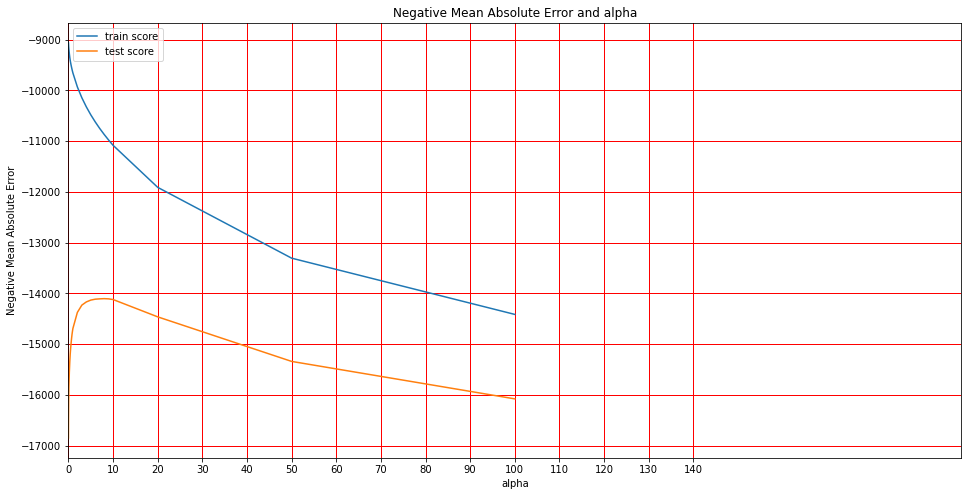

In [1317]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 150, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [1318]:
# Rank 1 provides us the best value for alpha 
alpha = 8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
ridge_m2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred_ridge = ridge.predict(X_test)
ridge_m2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

ridge_lr = np.sum(np.square(y_test - y_test_pred_ridge))
print(ridge_lr)

ridge_mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(ridge_mse_train_lr)

ridge_mse_test_lr = mean_squared_error(y_test, y_test_pred_ridge)
print(ridge_mse_test_lr)



0.9454354136238928
0.9092767935231961
126842813037.66022
248320143.06346118
403958003.30465037


# Performing Lasso Regression

In [1319]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1320]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.067289,0.008425,0.002572,0.000070,0.0001,{'alpha': 0.0001},-17940.918585,-16727.582331,-16112.991000,-15646.358076,...,-17113.691765,1272.497362,27,-8828.888722,-9276.054670,-9135.013445,-9208.484810,-8888.695050,-9067.427339,177.108079
1,0.062640,0.002978,0.002726,0.000275,0.001,{'alpha': 0.001},-17929.880395,-16727.247477,-16110.457205,-15638.576782,...,-17107.880650,1270.933414,26,-8828.885188,-9276.090568,-9134.998840,-9208.496589,-8888.676145,-9067.429466,177.122066
2,0.063109,0.002865,0.002850,0.000443,0.01,{'alpha': 0.01},-17839.044171,-16674.998259,-16084.148735,-15561.303271,...,-17043.873321,1261.086999,25,-8828.874922,-9276.494406,-9135.064117,-9208.682630,-8888.642667,-9067.551748,177.261370
3,0.062923,0.002026,0.002756,0.000147,0.05,{'alpha': 0.05},-17505.393071,-16515.153945,-15977.601113,-15436.645207,...,-16852.911410,1201.643502,24,-8829.602744,-9278.480364,-9136.123485,-9209.915157,-8889.604052,-9068.745160,177.616607
4,0.062844,0.004355,0.002684,0.000233,0.1,{'alpha': 0.1},-17471.195388,-16441.103718,-15951.869866,-15414.654424,...,-16816.909223,1203.271449,23,-8830.860122,-9281.084725,-9137.759683,-9211.327994,-8891.176707,-9070.441846,177.924935
5,0.062156,0.002326,0.002594,0.000112,0.2,{'alpha': 0.2},-17451.279094,-16399.035322,-15876.007569,-15370.011574,...,-16771.164792,1209.876962,22,-8835.099958,-9286.019993,-9141.081032,-9214.554949,-8893.726755,-9074.096537,178.201943
6,0.063232,0.004108,0.002695,0.000183,0.3,{'alpha': 0.3},-17436.893045,-16347.273991,-15796.102928,-15337.043483,...,-16727.066159,1217.443099,21,-8839.950560,-9291.249432,-9144.820294,-9217.835884,-8896.000042,-9077.971243,178.485777
7,0.064432,0.003292,0.002716,0.000233,0.4,{'alpha': 0.4},-17413.949852,-16296.548478,-15717.340097,-15312.760341,...,-16682.046787,1219.869089,20,-8844.528705,-9297.957551,-9148.910934,-9221.106674,-8898.412639,-9082.183301,179.199426
8,0.062840,0.002249,0.002826,0.000388,0.5,{'alpha': 0.5},-17376.751714,-16248.545909,-15638.411518,-15289.440936,...,-16636.293551,1222.830091,19,-8848.982799,-9305.619239,-9152.895299,-9224.733113,-8900.945368,-9086.635164,180.208114
9,0.061984,0.002249,0.002526,0.000035,0.6,{'alpha': 0.6},-17343.454414,-16203.410287,-15564.306363,-15264.838246,...,-16593.148489,1226.713440,18,-8853.540880,-9312.980016,-9156.819299,-9228.744855,-8903.102697,-9091.037549,181.258476


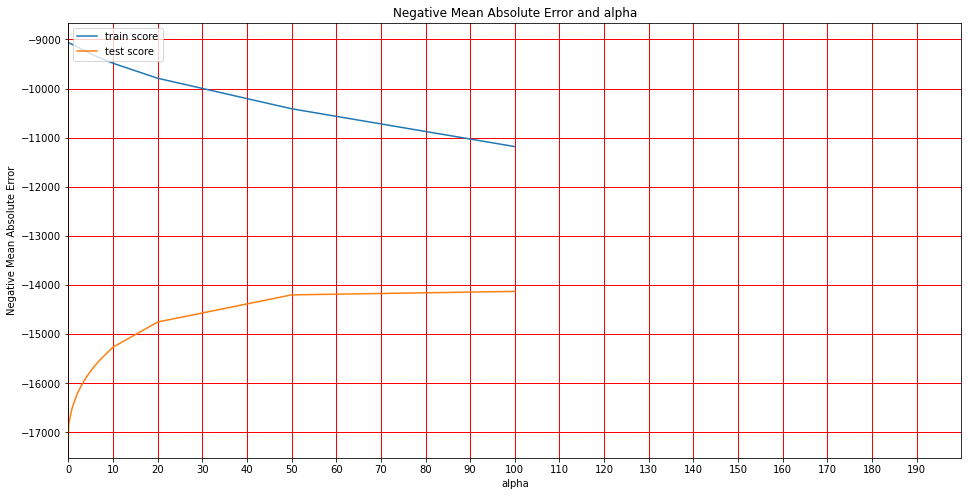

In [1321]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [1322]:
# Choosing Rank 2 Alpha as it gives maximum test acccuracy and minimum rmse and hence better fit
# for the model
alpha = 50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
lasso_train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# predict test score
y_test_pred_lasso = lasso.predict(X_test)
lasso_test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))


lasso_lr = np.sum(np.square(y_test - y_test_pred_lasso))
print(lasso_lr)

lasso_mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(lasso_mse_train_lr)

lasso_mse_tst_lr = mean_squared_error(y_test, y_test_pred_lasso)
print(lasso_mse_tst_lr)



0.9474552454906371
0.913308626850547
121205786957.99966
239128010.0074744
386005690.9490435


# Model Evaluaton

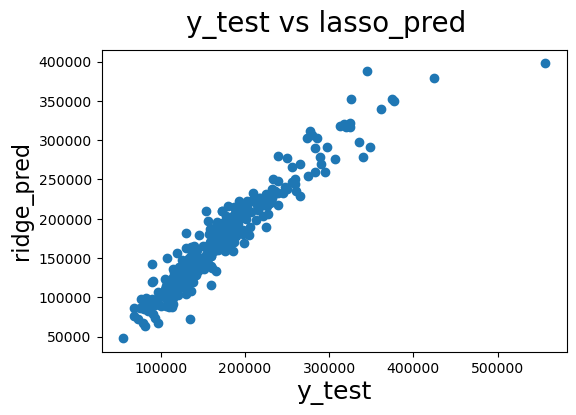

In [1323]:
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred_lasso)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

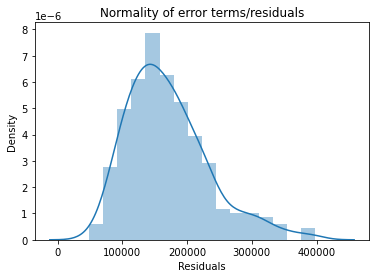

In [1324]:
y_res=y_test_pred_lasso
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

Text(0, 0.5, 'Sales Price')

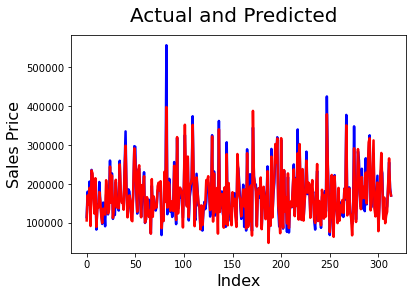

In [1325]:
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index',  fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

In [1326]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
LotFrontage,73.316398,49.197558
LotArea,0.892376,0.797677
MasVnrArea,-1.582351,-0.649349
BsmtFinSF1,15.863392,28.022150
BsmtFinSF2,13.092852,21.143480
BsmtUnfSF,-6.918573,7.877878
TotalBsmtSF,22.037672,6.964325
1stFlrSF,10.070055,38.585352
2ndFlrSF,13.123708,43.763438
LowQualFinSF,17.946989,39.010457


# Lassos Selected Top Model Parameters

In [1327]:
# lasso model parameters
model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True):
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(52799.742, 'OverallQual_D_10'),
 (42780.653, 'OverallQual_D_9'),
 (26717.345, 'Neighborhood_D_Crawfor'),
 (23051.747, 'SaleCondition_D_Partial'),
 (20285.505, 'Neighborhood_D_NridgHt'),
 (19760.406, 'OverallQual_D_8'),
 (18156.173, 'Neighborhood_D_StoneBr'),
 (15976.224, 'Functional_D_Typ'),
 (-14686.84, 'OverallCond_D_3'),
 (13957.723, 'SaleType_D_CWD'),
 (13020.666, 'Exterior2nd_D_Stucco'),
 (12406.797, 'BsmtExposure_D_Gd'),
 (-12074.161, 'ExterQual_D_TA'),
 (11813.719, 'Exterior1st_D_BrkFace'),
 (11385.101, 'MSZoning_D_FV'),
 (-10619.005, 'BsmtQual_D_Gd'),
 (-10501.113, 'MSSubClass_D_160'),
 (-10469.064, 'ExterQual_D_Fa'),
 (-10107.136, 'BsmtQual_D_TA'),
 (10083.578, 'Neighborhood_D_BrkSide'),
 (-9246.421, 'OverallCond_D_5'),
 (9074.406, 'OverallCond_D_8'),
 (8859.489, 'BsmtFinType1_D_GLQ'),
 (-8638.38, 'OverallCond_D_4'),
 (8260.533, 'Foundation_D_Slab'),
 (8102.402, 'OverallCond_D_9'),
 (7917.883, 'HouseStyle_D_1.5Unf'),
 (-7647.356, 'LandContour_D_Low'),
 (-7565.993, 'KitchenQu

Lasso Regression is chosen as it has better R2 Test/Train Score and less RMSE indicating a better fit.<br>

Q1: Which variables are significant in predicting the price of a house, and

The top 10 significant features with Lasso Regression:<br>
    1. Overal Quality <br>
    2. Neighbourhood <br>
    3. Sale Condition <br>
    4. Functional <br>
    5. Sale Type <br>
    6. Exterior <br>
    7. BsmtExposure <br>
    8. MSZoning <br>
    9. MSSubClass <br>
    10.ExterQual <br>

Q2: How well those variables describe the price of a house.

 The Lasso R2Score and RMSE <br>
 R2Score Train --> 0.9474552454906371 <br>
 R2Score Test --> 0.913308626850547 <br>
 RMSE Test ---> 386005690.9490435 <br>
 
 The Rigde R2Score and RMSE <br>
 
 R2Score Train -->  0.9454354136238928 <br>
 R2Score Test -->  0.9092767935231961 <br>
 RMSE Test ---> 403958003.30465037 <br>
 
 In above cell, we see that the indiviual coefficients for Lasso Regression


In [1328]:
# Question 1: Double the values of Alpha for RIdge

In [1329]:

alpha = 16
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
ridge_m2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred_ridge = ridge.predict(X_test)
ridge_m2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

ridge_lr = np.sum(np.square(y_test - y_test_pred_ridge))
print(ridge_lr)

ridge_mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(ridge_mse_train_lr)

ridge_mse_test_lr = mean_squared_error(y_test, y_test_pred_ridge)
print(ridge_mse_test_lr)


0.9391203014520121
0.9074392766800595
129411899982.87447
277059837.83864033
412139808.86265755


In [1330]:
# Question 1: Double the values of Alpha for Lasso
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
lasso_train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# predict test score
y_test_pred_lasso = lasso.predict(X_test)
lasso_test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))


lasso_lr = np.sum(np.square(y_test - y_test_pred_lasso))
print(lasso_lr)

lasso_mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(lasso_mse_train_lr)

lasso_mse_tst_lr = mean_squared_error(y_test, y_test_pred_lasso)
print(lasso_mse_tst_lr)


0.941347296427386
0.9120165046730527
123012341401.41682
266924917.96451834
391759049.0490982


In [1331]:
# We can see that after doubling the alpha values,  the r2 scoe decreases on training and test data and the RMSE increases.